In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [4]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=True)

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [6]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [7]:
df["date"].max()

'2020-07-27'

In [8]:
top = df[df["date"]== "2020-07-27"]
top

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [9]:
world = top.groupby("country").agg({
    "confirmed": "sum",
    "active": "sum",
    "deaths": "sum",
    "recovered": "sum"
}).reset_index()

world

,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [10]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Active Cases")
figure.show()

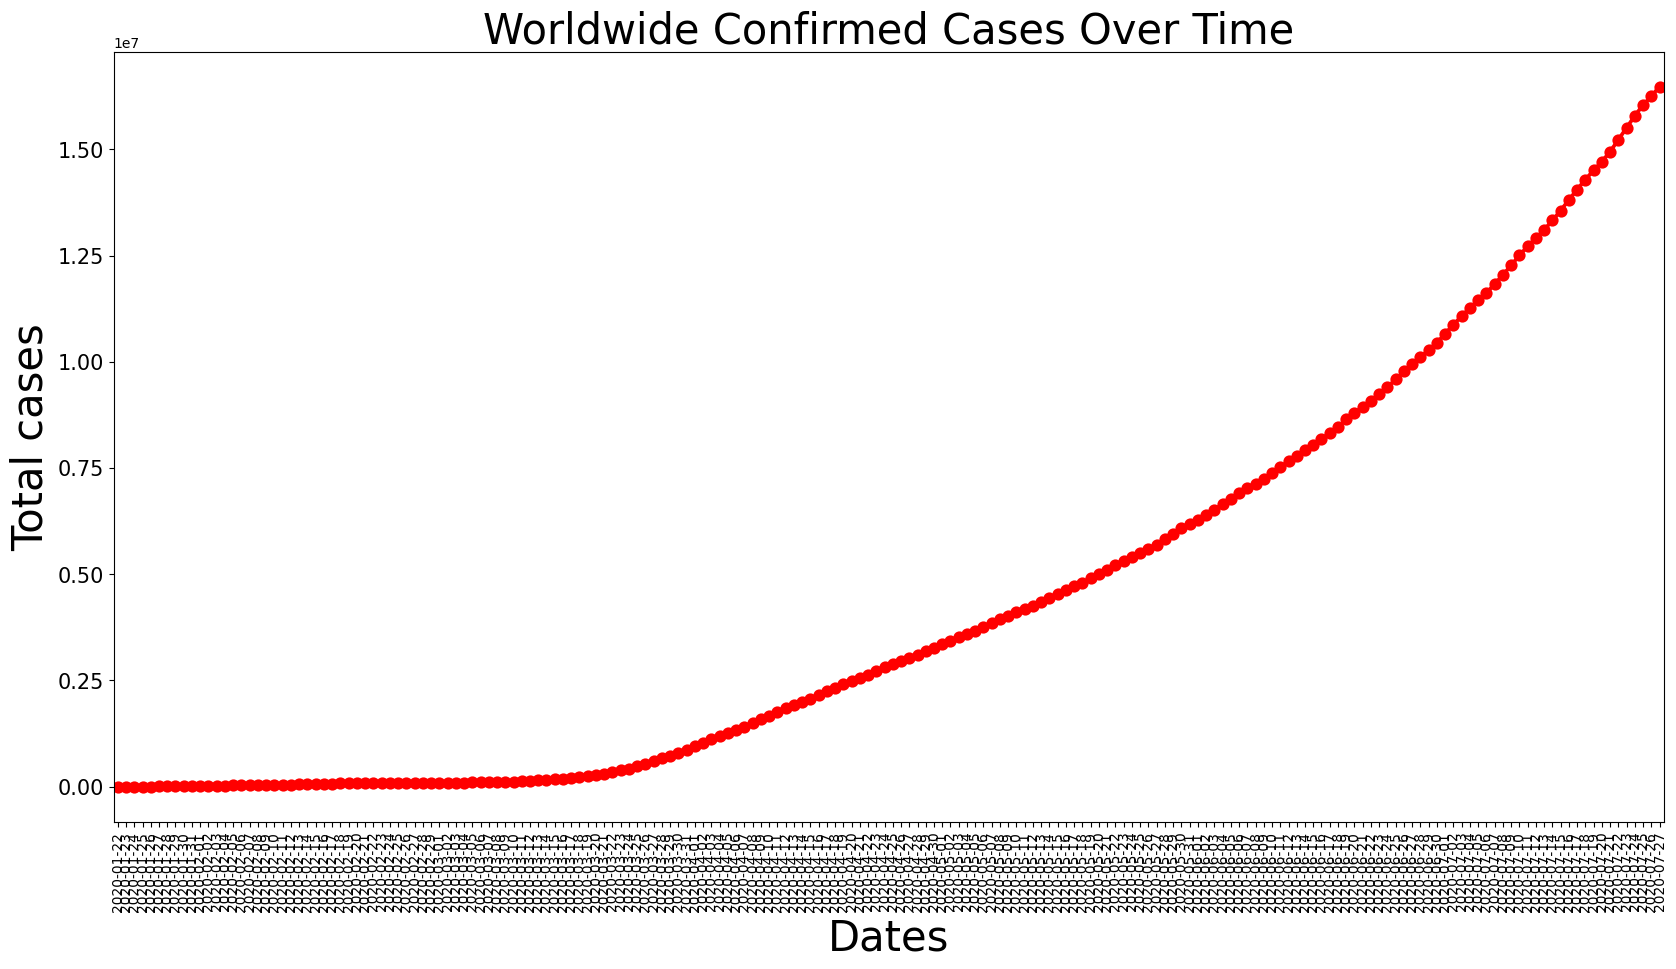

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
total_cases = df.groupby("date").agg({"confirmed": "sum"}).reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates", fontsize=30)
plt.ylabel("Total cases", fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time", fontsize=30)

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates", ylabel="Total cases")
plt.show()


In [14]:
recent_day = df[df["date"] == df["date"].max()]

top_actives = recent_day.groupby(by="country")["active"].sum().sort_values(ascending=False).head(10).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

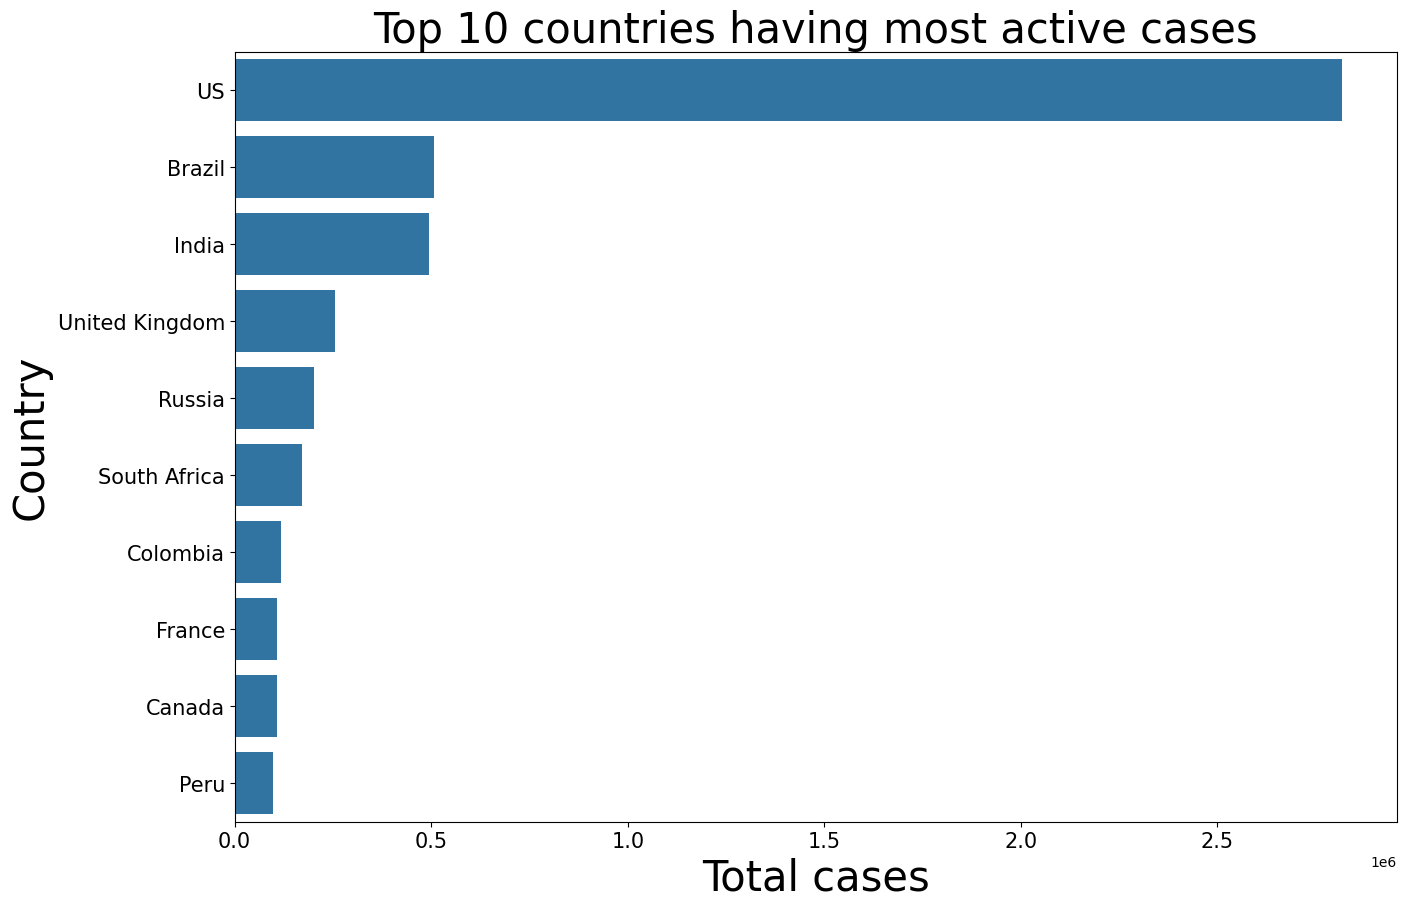

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [16]:
top_deaths = recent_day.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(10).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

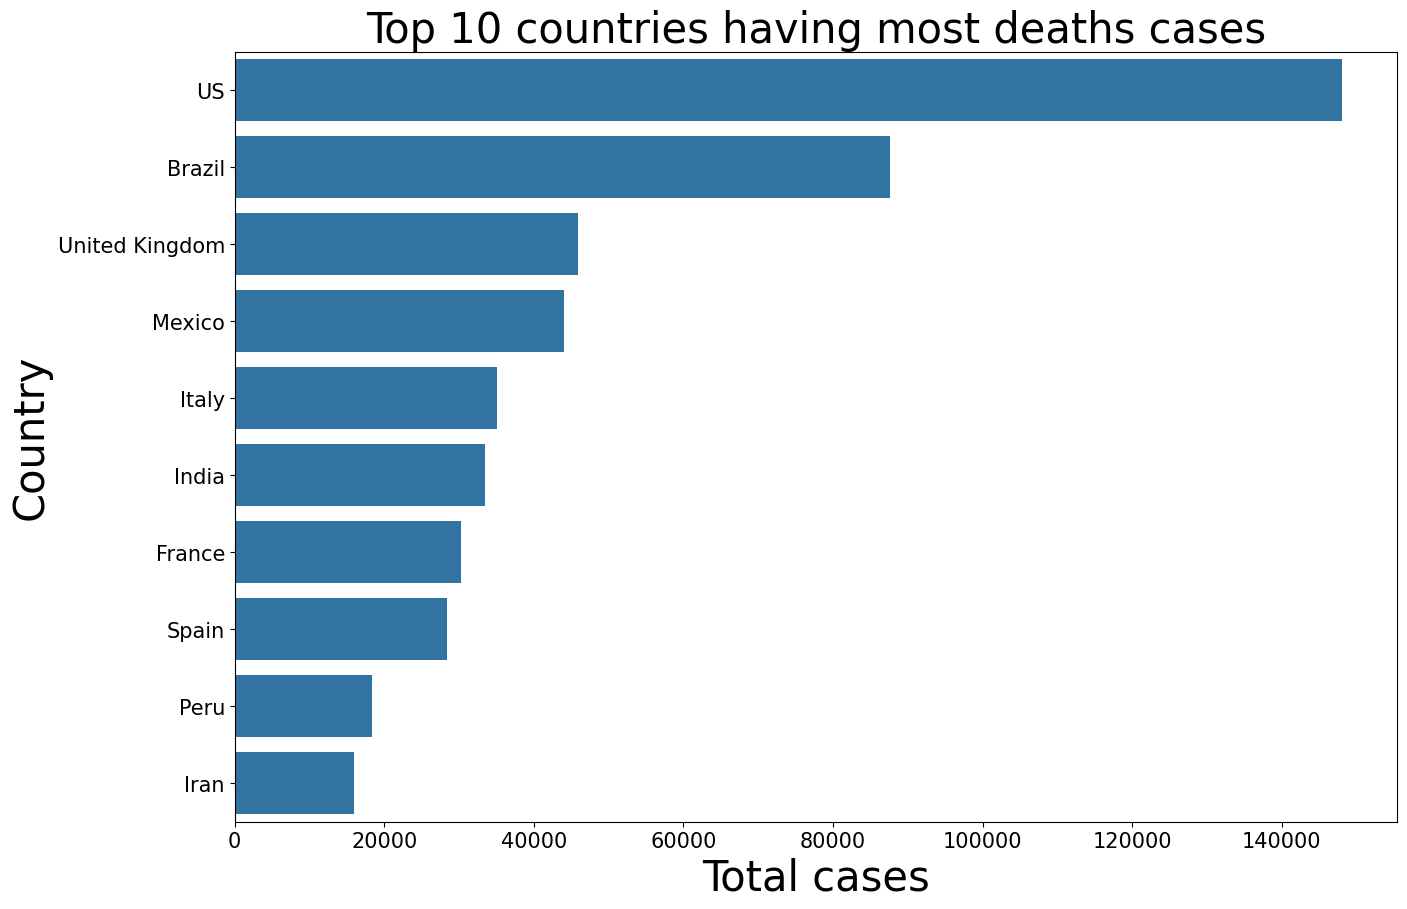

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most deaths cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

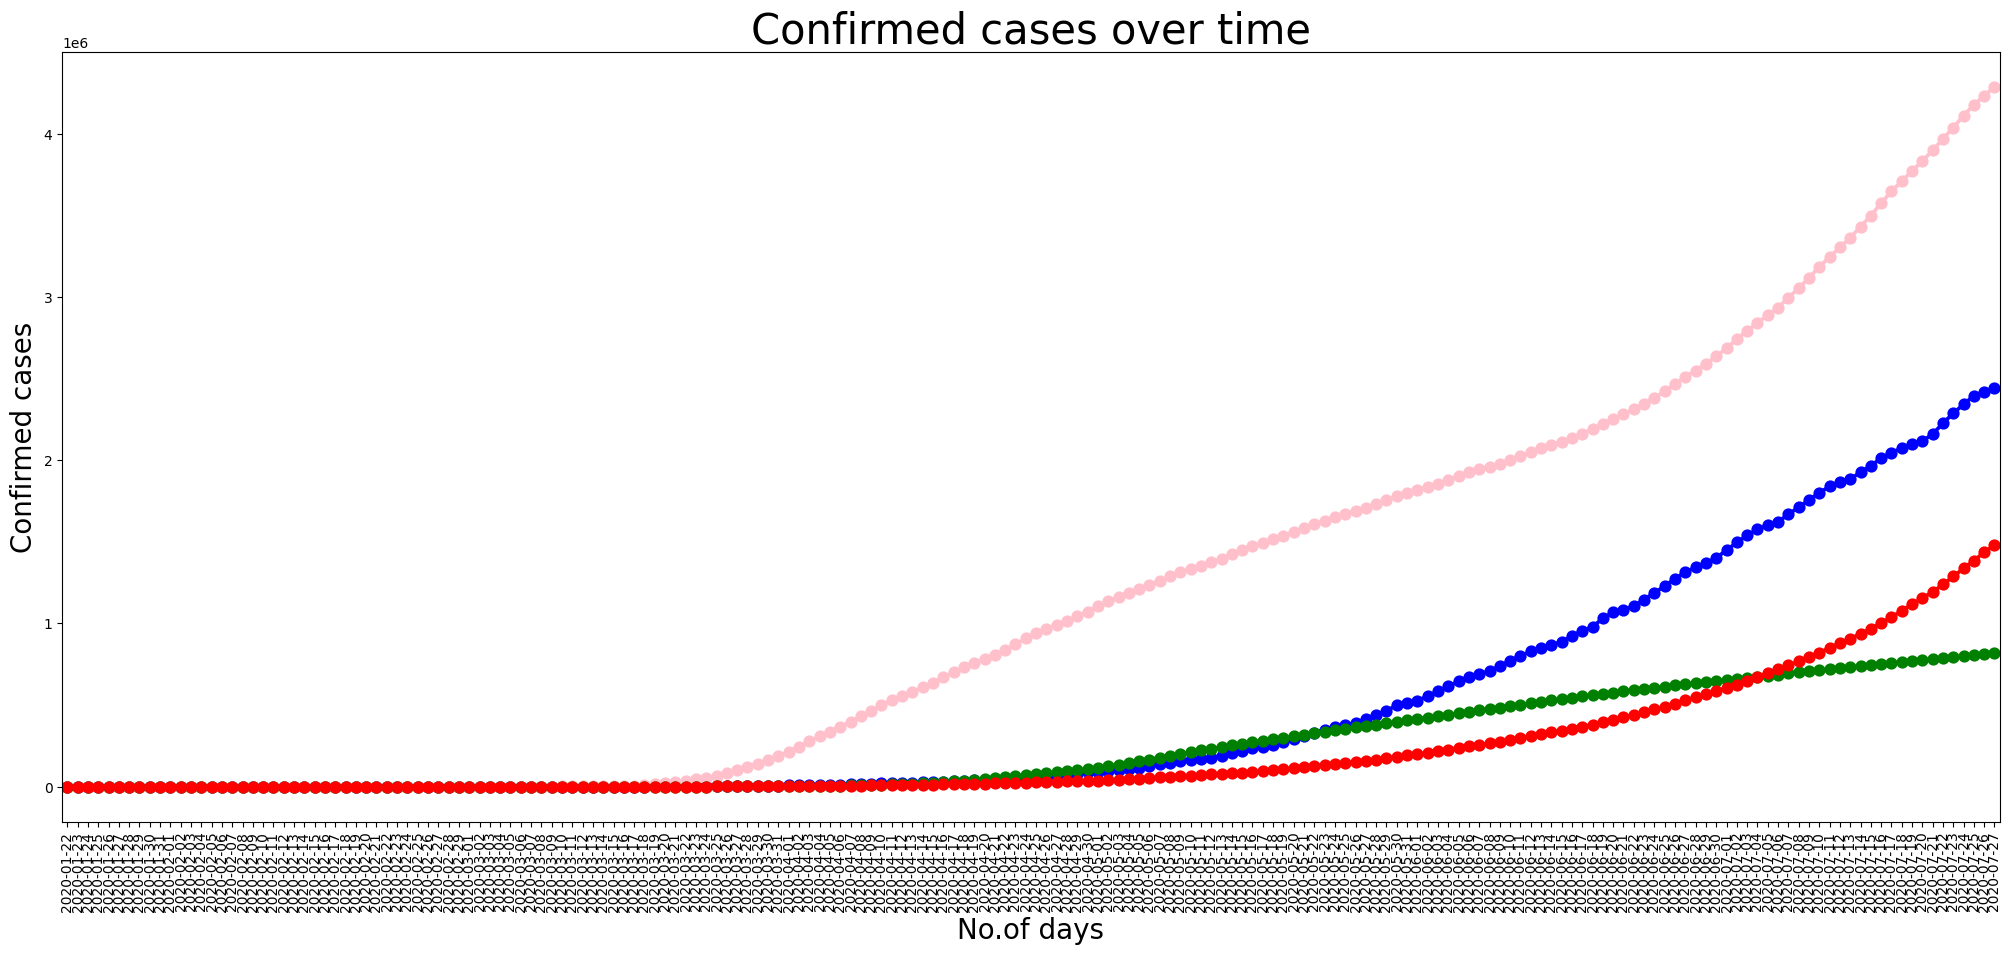

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


US = df[df['country'] == 'US']
brazil = df[df['country'] == 'Brazil']
russia = df[df['country'] == 'Russia']
UK = df[df['country'] == 'UK']
India = df[df['country'] == 'India']

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.confirmed,color="Blue")
sns.pointplot(x=US.date,y=US.confirmed,color="Pink")
sns.pointplot(x=russia.date,y=russia.confirmed,color="Green")
sns.pointplot(x=UK.date,y=UK.deaths,color="black")
sns.pointplot(x=India.date,y=India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()


In [22]:
!pip install prophet

In [23]:
from prophet import Prophet

In [24]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [25]:
Confirmed=df.groupby('date').sum()['confirmed'].reset_index()
Deaths=df.groupby('date').sum()['deaths'].reset_index()
Recovered=df.groupby('date').sum()['recovered'].reset_index()
Active=df.groupby('date').sum()['Active'].reset_index()

In [26]:
Confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [27]:
Active

,date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [28]:
Deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [29]:
Recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [30]:
Confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [31]:
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [32]:
model=Prophet(interval_width=0.95)

In [33]:
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaz2u0op/rccjlcw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmaz2u0op/hclekh9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23429', 'data', 'file=/tmp/tmpmaz2u0op/rccjlcw8.json', 'init=/tmp/tmpmaz2u0op/hclekh9v.json', 'output', 'file=/tmp/tmpmaz2u0op/prophet_model0cbzas7o/prophet_model-20240824142939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future=model.make_future_dataframe(periods=7)

In [35]:
future.tail(10)

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [36]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.616783e+07,1.647746e+07
189,2020-07-29,1.652997e+07,1.634763e+07,1.669652e+07
190,2020-07-30,1.674391e+07,1.657742e+07,1.691007e+07
191,2020-07-31,1.695910e+07,1.679634e+07,1.712899e+07
192,2020-08-01,1.716676e+07,1.699727e+07,1.734072e+07
193,2020-08-02,1.736430e+07,1.719498e+07,1.753565e+07
194,2020-08-03,1.755889e+07,1.738715e+07,1.772468e+07


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



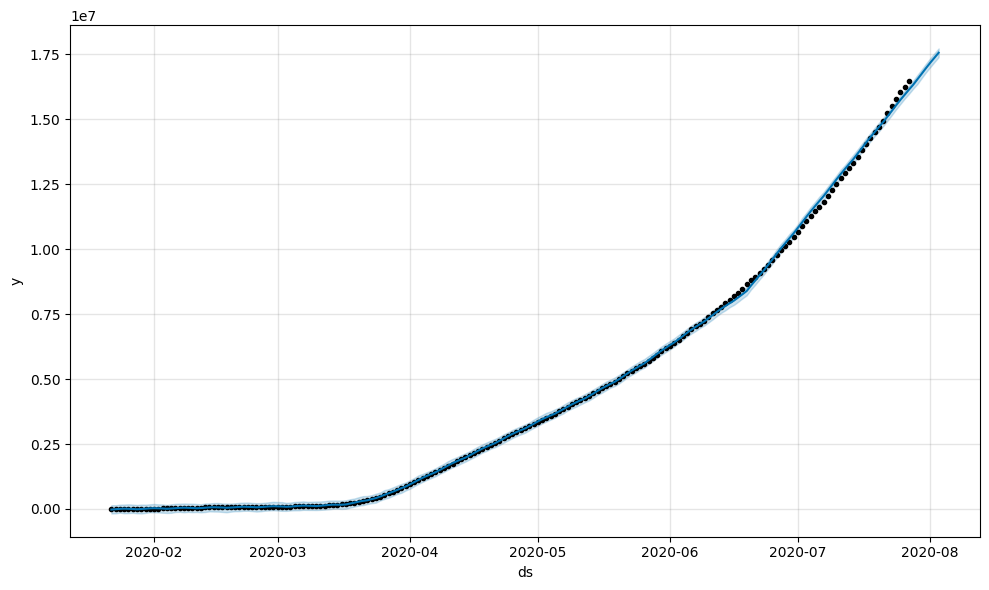

In [37]:
confirmed_forecast_plot = model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



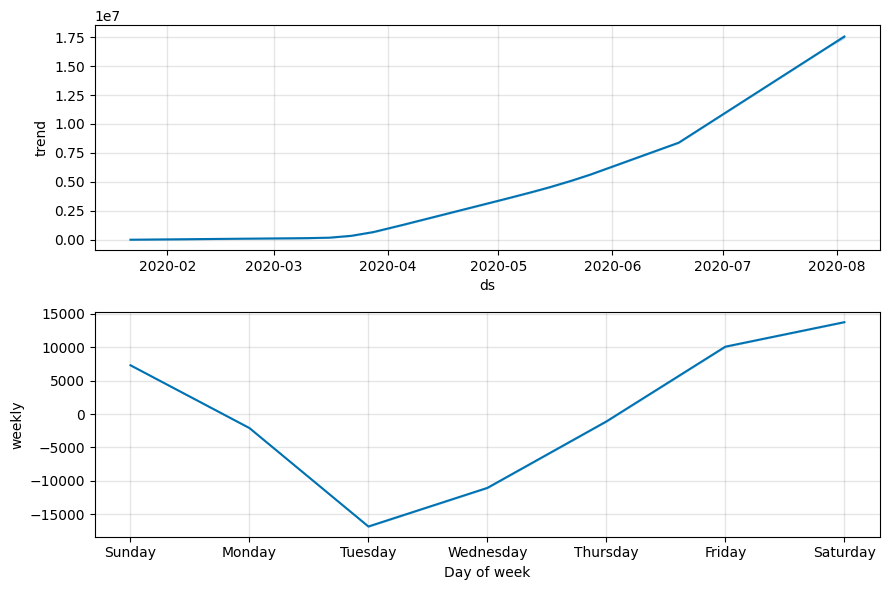

In [38]:
confirmed_forecast_plot1 = model.plot_components(forecast)